<a href="https://colab.research.google.com/github/nabilazy/BK_DataScience/blob/main/simulasi_ujian_sertifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulasi Ujian Sertifikasi


## 1) Mengumpulkan Data

Dataset didapatkan dari repository public pada link berikut : https://archive.ics.uci.edu/dataset/45/heart+disease

Nama dataset yang digunakan adalah 'cleveland.data'.

Dataset didownload melalui link repo di atas dan di upload di google drive.

## 2) Menelaah Data

import library

In [119]:
import pandas as pd
import re
import numpy as np
import itertools

### Load Data

Dataset 'cleveland.data' sudah disimpan di google drive. Google drive dihubungkan dengan colab.

Salin path file 'cleveland.data' lalu simpan di variabel dir.

In [120]:
dir = '/content/drive/MyDrive/heart+disease/cleveland.data'

buat iterasi untuk membaca dataset

In [121]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

In [122]:
lines[0:10]

['1 0 63 1 -9 -9 -9',
 '-9 1 145 1 233 -9 50 20',
 '1 -9 1 2 2 3 81 0',
 '0 0 0 0 1 10.5 6 13',
 '150 60 190 90 145 85 0 0',
 '2.3 3 -9 172 0 -9 -9 -9',
 '-9 -9 -9 6 -9 -9 -9 2',
 '16 81 0 1 1 1 -9 1',
 '-9 1 -9 1 1 1 1 1',
 '1 1 -9 -9 name']

In [123]:
data = itertools.takewhile(lambda x: len(x) == 76,
                           (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
                           )

In [124]:
# membuat dataframe
df = pd.DataFrame.from_records(data)

In [125]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1,0,63,1,-9,-9,-9,-9,1,145,...,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,...,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,...,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,...,1,1,1,1,1,1,1,-9,-9,name


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       282 non-null    object
 1   1       282 non-null    object
 2   2       282 non-null    object
 3   3       282 non-null    object
 4   4       282 non-null    object
 5   5       282 non-null    object
 6   6       282 non-null    object
 7   7       282 non-null    object
 8   8       282 non-null    object
 9   9       282 non-null    object
 10  10      282 non-null    object
 11  11      282 non-null    object
 12  12      282 non-null    object
 13  13      282 non-null    object
 14  14      282 non-null    object
 15  15      282 non-null    object
 16  16      282 non-null    object
 17  17      282 non-null    object
 18  18      282 non-null    object
 19  19      282 non-null    object
 20  20      282 non-null    object
 21  21      282 non-null    object
 22  22      282 non-null    ob

In [127]:
# Using list(df) to get the column headers as a list
column_names = list(df.columns)
print(column_names)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


In [128]:
n = df.nunique(axis=0)
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 0     282
1       1
2      41
3       2
4       1
     ... 
71      7
72      4
73      1
74      1
75      1
Length: 76, dtype: int64


In [129]:
att = []
for column in column_names:
  n = len(pd.unique(df[column]))
  # print(n)
  if n==1:
    att.append(column)

print(att)

[1, 4, 5, 6, 7, 12, 27, 41, 44, 45, 46, 47, 48, 49, 51, 52, 53, 61, 63, 65, 68, 69, 73, 74, 75]


Dari hasil di atas, fitur yang tersimpan di list att adalah fitur yang semua valuenya sama. Jadi fitur tersebut bisa di drop.

In [130]:
# drop columns yang tidak dibutuhkan
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

In [131]:
column_names = list(df.columns)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       282 non-null    object
 1   2       282 non-null    object
 2   3       282 non-null    object
 3   4       282 non-null    object
 4   5       282 non-null    object
 5   6       282 non-null    object
 6   7       282 non-null    object
 7   8       282 non-null    object
 8   9       282 non-null    object
 9   10      282 non-null    object
 10  11      282 non-null    object
 11  12      282 non-null    object
 12  13      282 non-null    object
 13  14      282 non-null    object
 14  15      282 non-null    object
 15  16      282 non-null    object
 16  17      282 non-null    object
 17  18      282 non-null    object
 18  19      282 non-null    object
 19  20      282 non-null    object
 20  21      282 non-null    object
 21  22      282 non-null    object
 22  23      282 non-null    ob

In [133]:
df = df.astype(float)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       282 non-null    float64
 4   5       282 non-null    float64
 5   6       282 non-null    float64
 6   7       282 non-null    float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      282 non-null    float64
 12  13      282 non-null    float64
 13  14      282 non-null    float64
 14  15      282 non-null    float64
 15  16      282 non-null    float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      282 non-null    float64
 22  23

Karakteristik umum dataset adalah semua tipe data fiturnya object, tidak ada nilai null. Terdapat 76 columns dan 282 baris. Nama column berupa angka

### Membuat model menggunakan raw data

Fitur 58 merupakan fitur yang merepresentasikan class/target

In [135]:
# split dataset
X_raw = df.drop(57, axis=1).values
y_raw = df[57]

In [136]:
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

In [137]:
X_train_raw

array([[ 0., 51.,  1., ...,  1., -9., -9.],
       [ 0., 62.,  0., ...,  2., -9., -9.],
       [ 0., 49.,  1., ...,  1., -9., -9.],
       ...,
       [ 0., 59.,  1., ...,  1., -9., -9.],
       [ 0., 61.,  1., ...,  1., -9., -9.],
       [ 0., 57.,  0., ...,  1., -9., -9.]])

In [138]:
y_train_raw

139    0.0
193    2.0
19     0.0
159    0.0
140    0.0
      ... 
188    1.0
71     3.0
106    2.0
270    1.0
102    0.0
Name: 57, Length: 225, dtype: float64

In [139]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score, classification_report
from sklearn.tree import DecisionTreeClassifier

dt_model_raw = DecisionTreeClassifier()
dt_model_raw.fit(X_train_raw, y_train_raw)

DecisionTreeClassifier()

In [140]:
# make predictions
y_pred_raw = dt_model_raw.predict(X_test_raw)

# Evaluate the Decision Tree Model
print("Decision Tree Raw Model : ")
accuracy_raw = round(accuracy_score(y_test_raw, y_pred_raw), 3)
print("Accuracy :", accuracy_raw)
print("Classification Report : ")
print(classification_report(y_test_raw, y_pred_raw))

Decision Tree Raw Model : 
Accuracy : 0.93
Classification Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        29
         1.0       0.82      1.00      0.90         9
         2.0       0.80      0.80      0.80         5
         3.0       0.89      0.89      0.89         9
         4.0       1.00      0.60      0.75         5

    accuracy                           0.93        57
   macro avg       0.90      0.86      0.87        57
weighted avg       0.94      0.93      0.93        57



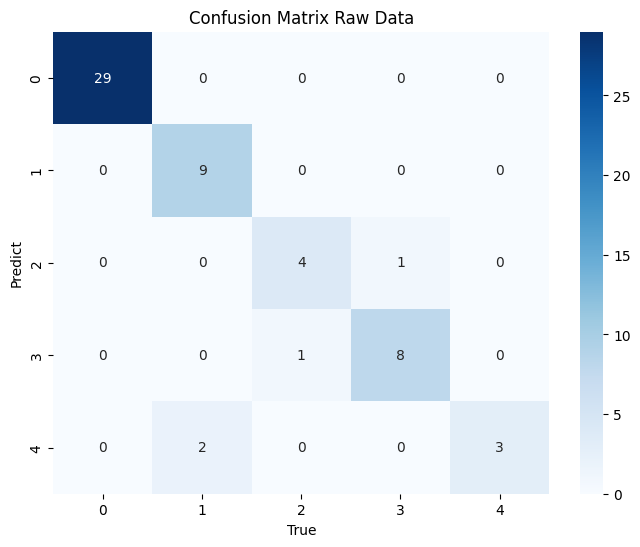

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_raw, y_pred_raw)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Raw Data')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## 3) Validasi Data

Tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya.

Pada dataset, nilai null direpresentasikan dengan nilai -9.0. Nilai tersebut perlu diubah menjadi null value yang sebenarnya.

Mengganti nilai -9.0 menjadi NaN

In [142]:
df.replace(-9.0, np.nan, inplace=True)

In [143]:
df.isnull().sum()

1       0
2       0
3       0
4     282
5     282
     ... 
70      0
71      0
72      0
73    282
74    282
Length: 74, dtype: int64

In [144]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,1.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       0 non-null      float64
 4   5       0 non-null      float64
 5   6       0 non-null      float64
 6   7       0 non-null      float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      0 non-null      float64
 12  13      277 non-null    float64
 13  14      277 non-null    float64
 14  15      282 non-null    float64
 15  16      23 non-null     float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      280 non-null    float64
 22  23

### Latihan menentukan threshold untuk menghapus null value

semisal threshold = 50%. Jika jumlah nilai null suatu kolom lebih dari 50%, maka kolom tersebut akan dihapus

In [146]:
# menghitung jumlah baris data pada dataframe
num_row = df.shape[0]
threshold = 0.5 * num_row
print(num_row)
print(threshold)

# index 0 = rows; index = 1 = columns

282
141.0


In [147]:
print(column_names)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]


In [148]:
col_drop = []
for col in column_names:
  count_nan = df[col].isnull().sum()
  if count_nan > threshold:
    col_drop.append(col)

print(col_drop)

[4, 5, 6, 7, 12, 16, 41, 44, 45, 46, 47, 48, 49, 51, 52, 53, 61, 63, 65, 73, 74]


In [149]:
# drop column yang null valuesnya lebih dari 50% total baris
df = df.drop(col_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   8       282 non-null    float64
 4   9       282 non-null    float64
 5   10      282 non-null    float64
 6   11      282 non-null    float64
 7   13      277 non-null    float64
 8   14      277 non-null    float64
 9   15      282 non-null    float64
 10  17      282 non-null    float64
 11  18      282 non-null    float64
 12  19      282 non-null    float64
 13  20      282 non-null    float64
 14  21      282 non-null    float64
 15  22      280 non-null    float64
 16  23      280 non-null    float64
 17  24      280 non-null    float64
 18  25      280 non-null    float64
 19  26      280 non-null    float64
 20  27      282 non-null    float64
 21  28      282 non-null    float64
 22  29

In [150]:
df.isnull().sum()

1      0
2      0
3      0
8      0
9      0
10     0
11     0
13     5
14     5
15     0
17     0
18     0
19     0
20     0
21     0
22     2
23     2
24     2
25     2
26     2
27     0
28     0
29    69
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
42     0
43     2
50     2
54     0
55     0
56     0
57     0
58     0
59     0
60     0
62     0
64     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
dtype: int64

## 4) Menentukan objek data

memilih 14 fitur sesuai deskripsi dataset

In [151]:
# df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]
df_selected = df.loc[:, [2,3,8,9,11,15,18,31,37,39,40,43,50,57]]

# iloc --> access through index
# loc --> access through column name

In [152]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [153]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       282 non-null    float64
 1   3       282 non-null    float64
 2   8       282 non-null    float64
 3   9       282 non-null    float64
 4   11      282 non-null    float64
 5   15      282 non-null    float64
 6   18      282 non-null    float64
 7   31      282 non-null    float64
 8   37      282 non-null    float64
 9   39      282 non-null    float64
 10  40      282 non-null    float64
 11  43      280 non-null    float64
 12  50      280 non-null    float64
 13  57      282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


mengganti nama kolom sesuai dengan 14 nama kolom yang tertera pada deskripsi dataset

In [154]:
# column_mapping = {
#     3: 'age',
#     4: 'sex',
#     9: 'cp',
#     10: 'trestbps',
#     12: 'chol',
#     16: 'fbs',
#     19: 'restecg',
#     32: 'thalach',
#     38: 'exang',
#     40: 'oldpeak',
#     41: 'slope',
#     44: 'ca',
#     51: 'thal',
#     58: 'target'
# }

column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

df_selected.rename(columns=column_mapping, inplace=True)

In [155]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        280 non-null    float64
 12  thal      280 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


## 5) Membersihkan data

### Menghilangkan null values

menghitung jumlah null values pada dataset yang digunakan

In [156]:
df_selected.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        2
target      0
dtype: int64

Karena nilai null value hanya sedikit, maka di lakukan replace null values

In [157]:
meanCa = df_selected['ca'].dropna()
meanThal = df_selected['thal']

In [158]:
meanCa = meanCa.astype(float)
meanThal = meanThal.astype(float)

In [159]:
meanCa = round(meanCa.mean())
meanThal = round(meanThal.mean())

In [160]:
fill_values = {'ca':meanCa, 'thal':meanThal}
dfClean = df_selected.fillna(value=fill_values)

In [161]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [162]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Menghilangkan duplicate data

In [163]:
duplicate_rows = dfClean.duplicated()
duplicate_rows
# melihat baris data yang merupakan data duplikat
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.091125,0.077383,0.274466,0.218295,0.104400,0.134438,-0.393266,0.087174,0.195740,0.156108,0.353728,0.103751,0.210747
sex,-0.091125,1.000000,0.022619,-0.058920,-0.189397,0.054396,0.032665,-0.054792,0.189095,0.103771,0.040438,0.095005,0.389126,0.239516
cp,0.077383,0.022619,1.000000,-0.070886,0.098889,-0.071550,0.061007,-0.318512,0.364757,0.173221,0.147143,0.208906,0.259609,0.383891
trestbps,0.274466,-0.058920,-0.070886,1.000000,0.157118,0.142902,0.128652,-0.029739,0.061072,0.197026,0.137713,0.080754,0.122973,0.151776
chol,0.218295,-0.189397,0.098889,0.157118,1.000000,0.019506,0.166490,-0.018392,0.088988,0.044771,0.000546,0.129764,0.040570,0.098895
fbs,0.104400,0.054396,-0.071550,0.142902,0.019506,1.000000,0.054025,0.019948,0.027573,-0.024812,0.056060,0.117625,0.064050,0.039690
restecg,0.134438,0.032665,0.061007,0.128652,0.166490,0.054025,1.000000,-0.082132,0.088781,0.107675,0.155901,0.112083,0.020806,0.187365
thalach,-0.393266,-0.054792,-0.318512,-0.029739,-0.018392,0.019948,-0.082132,1.000000,-0.374316,-0.344748,-0.384825,-0.254544,-0.256681,-0.396194
exang,0.087174,0.189095,0.364757,0.061072,0.088988,0.027573,0.088781,-0.374316,1.000000,0.285568,0.263093,0.151577,0.334712,0.398880
oldpeak,0.195740,0.103771,0.173221,0.197026,0.044771,-0.024812,0.107675,-0.344748,0.285568,1.000000,0.600446,0.253958,0.331229,0.487529


<Axes: >

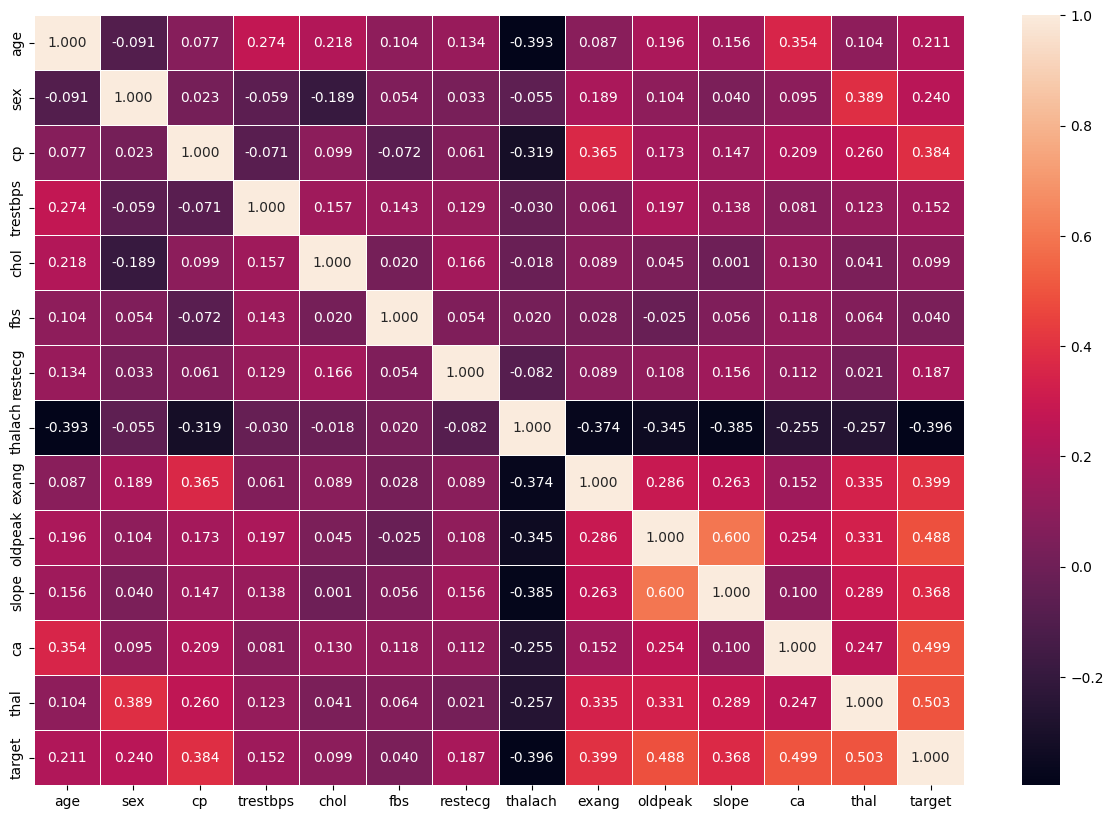

In [166]:
cor_mat = dfClean.corr()
fix,ag = plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt=".3f")

## 6) Konstruksi Data

In [167]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [168]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [169]:
# split dataset
X = dfClean.drop("target", axis=1).values
y = dfClean.iloc[:,-1]

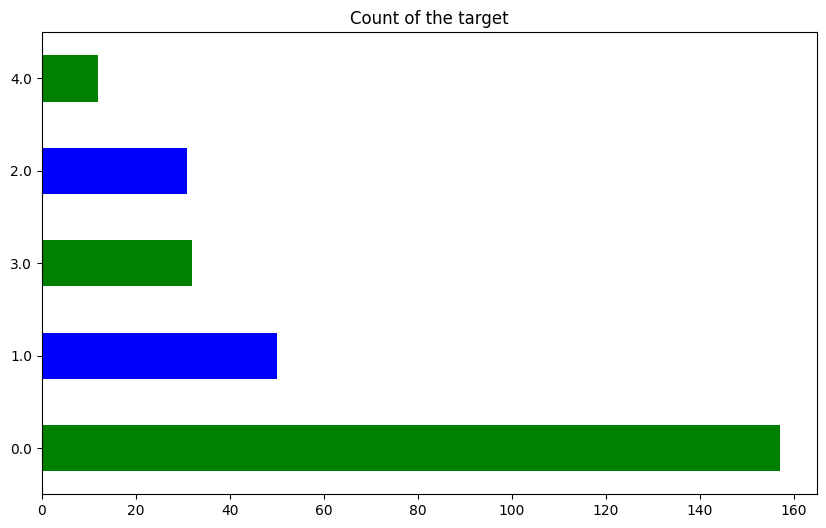

In [170]:
# membuat bar graph yang horizontal
dfClean['target'].value_counts().plot(kind='barh',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);

In [171]:
dfClean['target'].value_counts()

0.0    157
1.0     50
3.0     32
2.0     31
4.0     12
Name: target, dtype: int64

Balancing data dengan metode oversample menggunakan ADASYN --> mencoba alternatif selain SMOTE

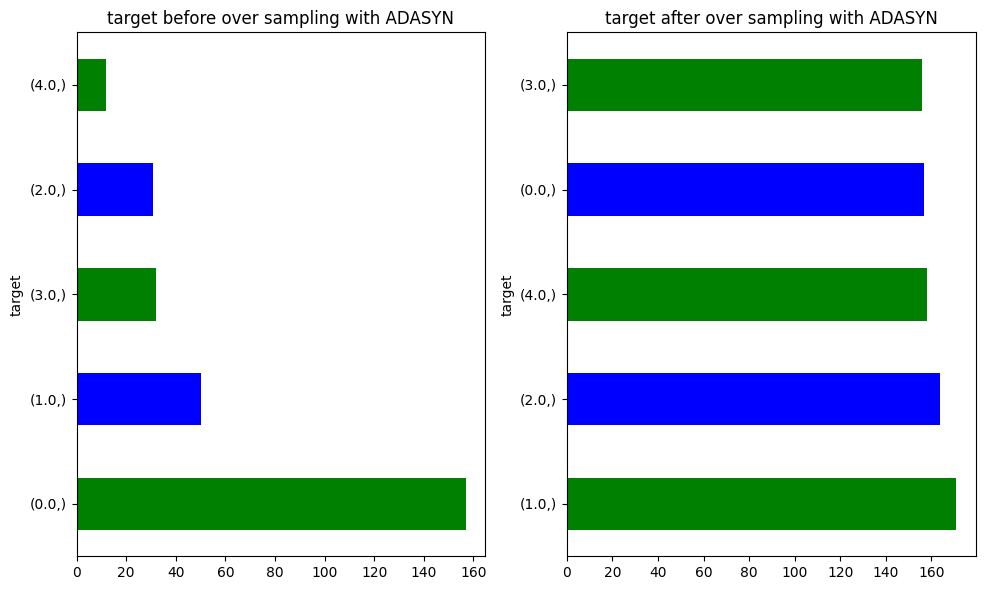

In [172]:
from imblearn.over_sampling import SMOTE, ADASYN

# oversampling --> performed on dataset (X, y)
# initialize SMOTE object
adasyn = ADASYN(random_state=42)
# fit_resample --> to oversample minority class in target variable 'y'
X_adasyn_resampled, y_adasyn_resampled = adasyn.fit_resample(X, y)

plt.figure(figsize=(12,4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='barh',figsize=(10,6),color=['green','blue'])
plt.title("target before over sampling with ADASYN")
plt.xticks(rotation=0);

plt.subplot(1,2,2)
new_df2 = pd.DataFrame(data=y_adasyn_resampled)
new_df2.value_counts().plot(kind='barh',figsize=(10,6),color=['green','blue'])
plt.title("target after over sampling with ADASYN")
plt.xticks(rotation=0);

# .tight_layout --> to automatically adjust subplot parameters to give specified padding.
plt.tight_layout()
plt.show()

In [173]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       157
1.0        50
3.0        32
2.0        31
4.0        12
dtype: int64

In [174]:
# oversampling
new_df2 = pd.DataFrame(data=y_adasyn_resampled)
new_df2.value_counts()

target
1.0       171
2.0       164
4.0       158
0.0       157
3.0       156
dtype: int64

Normalisasi or not?

In [175]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.666667,4.680851,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,0.933113,1.932377,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Mencoba normalisasi menggunakan StandardScaler

In [176]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_adasyn_resampled_normal = scaler.fit_transform(X_adasyn_resampled)
len(X_adasyn_resampled_normal)

806

In [177]:
dfcek1 = pd.DataFrame(X_adasyn_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02
mean,-1.639714e-15,-2.547728e-15,3.526267e-16,-6.021100e-15,2.309705e-15,-7.493317e-17,3.526267e-16,-4.848617e-15,-1.410507e-16,2.468387e-16,1.622083e-15,5.289400e-16,7.405160e-16
std,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00
min,-3.422542e+00,-2.163629e+00,-3.116374e+00,-2.468884e+00,-2.593207e+00,-4.830772e-01,-1.357436e+00,-3.375626e+00,-1.044278e+00,-1.350198e+00,-1.508330e+00,-1.132194e+00,-1.498732e+00
25%,-6.572616e-01,-9.846518e-02,-5.959901e-01,-6.950938e-01,-6.996477e-01,-4.830772e-01,-1.357436e+00,-7.438446e-01,-1.044278e+00,-8.154729e-01,-9.315002e-01,-1.132194e+00,-1.295859e+00
50%,1.166965e-01,5.578658e-01,6.642019e-01,-1.049593e-01,-5.224051e-02,-4.830772e-01,5.638835e-01,3.283272e-02,-2.196845e-01,-4.182629e-02,4.463946e-01,-7.305763e-02,5.603736e-01
75%,7.253784e-01,5.578658e-01,6.642019e-01,5.788489e-01,6.795686e-01,-4.830772e-01,9.198573e-01,7.819477e-01,1.227359e+00,7.055397e-01,4.463946e-01,8.675272e-01,8.574284e-01
max,2.610796e+00,5.578658e-01,6.642019e-01,4.125221e+00,6.522991e+00,2.646368e+00,9.198573e-01,2.816497e+00,1.227359e+00,4.175292e+00,2.401119e+00,2.045215e+00,8.574284e-01


Split dataset untuk training dan testing

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_adasyn_resampled, y_adasyn_resampled, test_size=0.2, random_state=42, stratify=y_adasyn_resampled)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_adasyn_resampled_normal, y_adasyn_resampled, test_size=0.2, random_state=42, stratify=y_adasyn_resampled)

## 7) Model

In [179]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix

def evaluation(Y_test, Y_pred) :
  acc = accuracy_score(Y_test,Y_pred)
  rcl = recall_score(Y_test, Y_pred, average='weighted')
  f1 = f1_score(Y_test, Y_pred, average='weighted')
  ps = precision_score(Y_test, Y_pred, average='weighted')

  metric_dict = {'accuracy' : round(acc, 3),
                 'recall' : round(rcl,3),
                 'F1 Score' : round(f1, 3),
                 'Precision Score' : round(ps, 3)}
  print(metric_dict)

### Oversample

#### Decision Tree

In [180]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [181]:
y_pred_dt = dt_model.predict(X_test)

In [182]:
# Evaluate the Decision Tree Model
print("Decision Tree Model : ")
accuracy_dt_adasyn = round(accuracy_score(y_test, y_pred_dt), 3)
print("Accuracy :", accuracy_dt_adasyn)
print("Classification Report :")
print(classification_report(y_test, y_pred_dt))

Decision Tree Model : 
Accuracy : 0.753
Classification Report :
              precision    recall  f1-score   support

         0.0       0.81      0.66      0.72        32
         1.0       0.56      0.65      0.60        34
         2.0       0.80      0.85      0.82        33
         3.0       0.74      0.74      0.74        31
         4.0       0.90      0.88      0.89        32

    accuracy                           0.75       162
   macro avg       0.76      0.75      0.76       162
weighted avg       0.76      0.75      0.75       162



In [183]:
evaluation(y_test, y_pred_dt)

{'accuracy': 0.753, 'recall': 0.753, 'F1 Score': 0.755, 'Precision Score': 0.761}


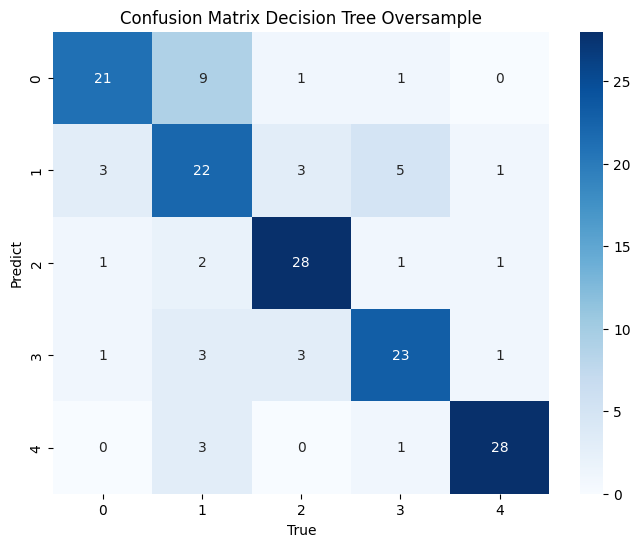

In [184]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Decision Tree Oversample')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### SVM

In [185]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [186]:
y_pred_svm = svm_model.predict(X_test)

In [187]:
# Evaluate the SVM Model
print("SVM Model : ")
accuracy_svm_adasyn = round(accuracy_score(y_test, y_pred_svm), 3)
print("Accuracy :", accuracy_svm_adasyn)
print("Classification Report :")
print(classification_report(y_test, y_pred_svm))

SVM Model : 
Accuracy : 0.37
Classification Report :
              precision    recall  f1-score   support

         0.0       0.69      0.34      0.46        32
         1.0       0.25      0.44      0.32        34
         2.0       0.39      0.61      0.48        33
         3.0       0.50      0.06      0.11        31
         4.0       0.40      0.38      0.39        32

    accuracy                           0.37       162
   macro avg       0.45      0.37      0.35       162
weighted avg       0.44      0.37      0.35       162



In [188]:
evaluation(y_test, y_pred_svm)

{'accuracy': 0.37, 'recall': 0.37, 'F1 Score': 0.352, 'Precision Score': 0.442}


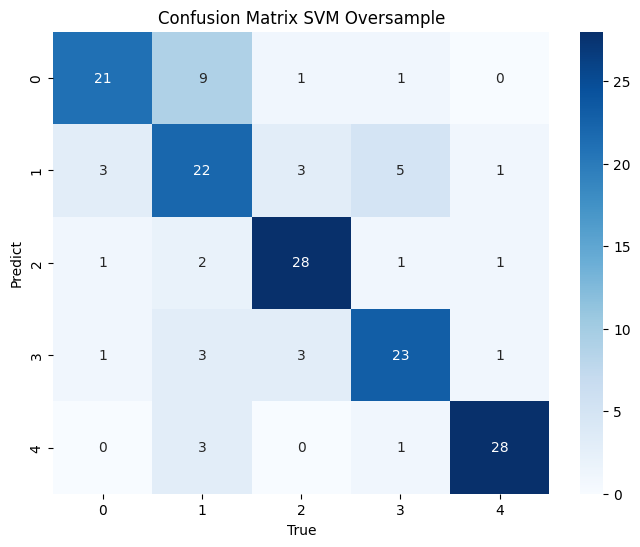

In [189]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix SVM Oversample')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Oversample + Normal

#### Decision Tree

In [190]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score, classification_report
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_normal, y_train_normal)

DecisionTreeClassifier()

In [191]:
y_pred_dt = dt_model.predict(X_test_normal)

In [192]:
# Evaluate the KNN Model
print("Decision Tree Model : ")
accuracy_dt_adasyn_normal = round(accuracy_score(y_test_normal, y_pred_dt), 3)
print("Accuracy :", accuracy_dt_adasyn_normal)
print("Classification Report :")
print(classification_report(y_test_normal, y_pred_dt))

Decision Tree Model : 
Accuracy : 0.759
Classification Report :
              precision    recall  f1-score   support

         0.0       0.84      0.66      0.74        32
         1.0       0.59      0.68      0.63        34
         2.0       0.78      0.85      0.81        33
         3.0       0.74      0.74      0.74        31
         4.0       0.90      0.88      0.89        32

    accuracy                           0.76       162
   macro avg       0.77      0.76      0.76       162
weighted avg       0.77      0.76      0.76       162



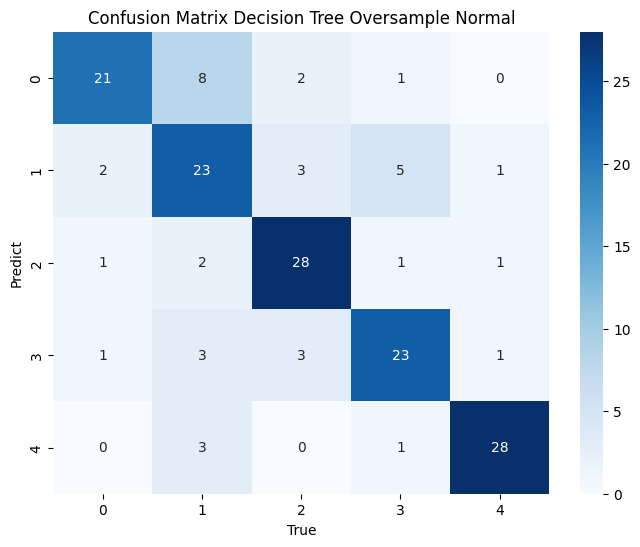

In [193]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Decision Tree Oversample Normal')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### SVM

In [194]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_normal, y_train_normal)

SVC()

In [195]:
y_pred_svm = svm_model.predict(X_test_normal)

In [196]:
# Evaluate the SVM Model
print("SVM Model : ")
accuracy_svm_adasyn_normal = round(accuracy_score(y_test, y_pred_svm), 3)
print("Accuracy :", accuracy_svm_adasyn_normal)
print("Classification Report :")
print(classification_report(y_test, y_pred_svm))

SVM Model : 
Accuracy : 0.87
Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86        32
         1.0       0.77      0.68      0.72        34
         2.0       0.86      0.94      0.90        33
         3.0       0.88      0.94      0.91        31
         4.0       0.97      0.97      0.97        32

    accuracy                           0.87       162
   macro avg       0.87      0.87      0.87       162
weighted avg       0.87      0.87      0.87       162



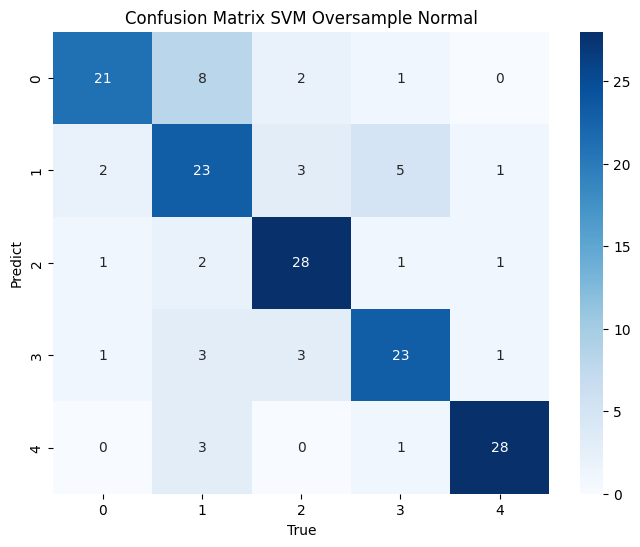

In [197]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix SVM Oversample Normal')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Tuning + Normalization + Oversample

#### Decision Tree

In [198]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score, classification_report
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
params = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}

dt_model = RandomizedSearchCV(estimator=dt_model, param_distributions=params, cv=5, n_iter=300, n_jobs=-1, verbose=True, scoring='accuracy')
dt_model.fit(X_train_normal, y_train_normal)

best_params = dt_model.best_params_
print(f"Best parameters : {best_params}")

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best parameters : {'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 15, 'criterion': 'gini'}


In [199]:
y_pred_dt = dt_model.predict(X_test_normal)
# Evaluate the Decision Tree Model
print("Decision Tree Model : ")
accuracy_dt_adasyn_normal_tun = round(accuracy_score(y_test_normal, y_pred_dt), 3)
print("Accuracy :", accuracy_dt_adasyn_normal_tun)
print("Classification Report :")
print(classification_report(y_test_normal, y_pred_dt))

Decision Tree Model : 
Accuracy : 0.765
Classification Report :
              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80        32
         1.0       0.60      0.74      0.66        34
         2.0       0.76      0.79      0.78        33
         3.0       0.79      0.71      0.75        31
         4.0       0.90      0.84      0.87        32

    accuracy                           0.77       162
   macro avg       0.78      0.77      0.77       162
weighted avg       0.78      0.77      0.77       162



In [200]:
evaluation(y_test_normal, y_pred_dt)

{'accuracy': 0.765, 'recall': 0.765, 'F1 Score': 0.769, 'Precision Score': 0.778}


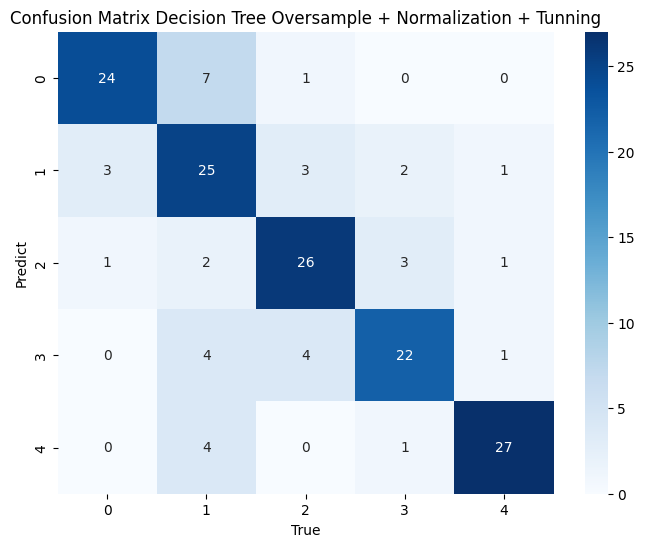

In [201]:
cm = confusion_matrix(y_test_normal, y_pred_dt)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Decision Tree Oversample + Normalization + Tunning')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### SVM

In [202]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

svm_model = SVC()

params = {'C':uniform(0.1, 10),
          'kernel': ['linear', 'rbf', 'poly'],
          'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 50))}

svm_model = RandomizedSearchCV(estimator=svm_model, param_distributions=params, n_iter=20, cv=5)
svm_model.fit(X_train_normal, y_train_normal)

best_params = svm_model.best_params_
print(f"Best parameters : {best_params}")

Best parameters : {'C': 5.88827920250963, 'gamma': 0.0517947467923121, 'kernel': 'rbf'}


In [203]:
y_pred_svm = svm_model.predict(X_test_normal)
# Evaluate the SVM Model
print("SVM Model : ")
accuracy_svm_adasyn_normal_tun = round(accuracy_score(y_test_normal, y_pred_svm), 3)
print("Accuracy :", accuracy_svm_adasyn_normal_tun)
print("Classification Report :")
print(classification_report(y_test_normal, y_pred_svm))

SVM Model : 
Accuracy : 0.92
Classification Report :
              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85        32
         1.0       0.85      0.85      0.85        34
         2.0       0.94      1.00      0.97        33
         3.0       0.91      0.94      0.92        31
         4.0       1.00      1.00      1.00        32

    accuracy                           0.92       162
   macro avg       0.92      0.92      0.92       162
weighted avg       0.92      0.92      0.92       162



In [204]:
evaluation(y_test_normal, y_pred_svm)

{'accuracy': 0.92, 'recall': 0.92, 'F1 Score': 0.919, 'Precision Score': 0.919}


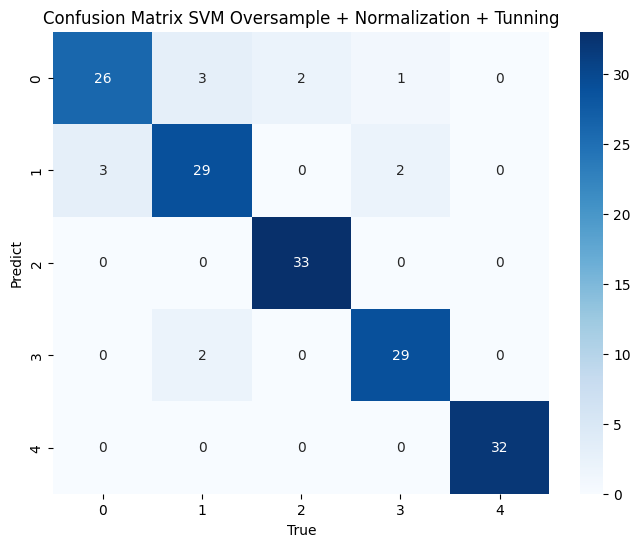

In [205]:
cm = confusion_matrix(y_test_normal, y_pred_svm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix SVM Oversample + Normalization + Tunning')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## 8) Evaluasi

### Perbandingan Oversample

In [206]:
import matplotlib.pyplot as plt

# membuat dataframe untuk perbandingan model
model_comp1 = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM'],
    'Accuracy': [accuracy_dt_adasyn*100, accuracy_svm_adasyn*100]
})

model_comp1.head()

,Model,Accuracy
0,Decision Tree,75.3
1,SVM,37.0


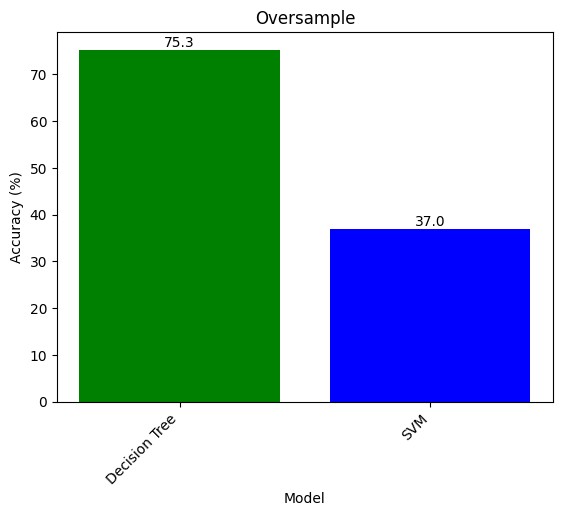

In [207]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right')

for bar in bars:
  yval= bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), ha='center', va='bottom')
plt.show()

### Perbandingan Oversample + Normalisasi

In [208]:
import matplotlib.pyplot as plt

# membuat dataframe untuk perbandingan model
model_comp2 = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM'],
    'Accuracy': [accuracy_dt_adasyn_normal*100, accuracy_svm_adasyn_normal*100]
})

model_comp2.head()

,Model,Accuracy
0,Decision Tree,75.9
1,SVM,87.0


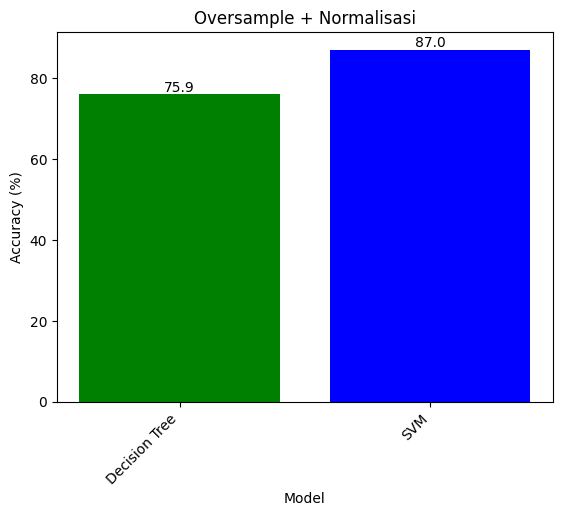

In [209]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample + Normalisasi')
plt.xticks(rotation=45, ha='right')

for bar in bars:
  yval= bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), ha='center', va='bottom')
plt.show()

### Perbandingan Oversample + Normalisasi + Tuning

In [210]:
import matplotlib.pyplot as plt

# membuat dataframe untuk perbandingan model
model_comp3 = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM'],
    'Accuracy': [accuracy_dt_adasyn_normal_tun*100, accuracy_svm_adasyn_normal_tun*100]
})

model_comp3.head()

,Model,Accuracy
0,Decision Tree,76.5
1,SVM,92.0


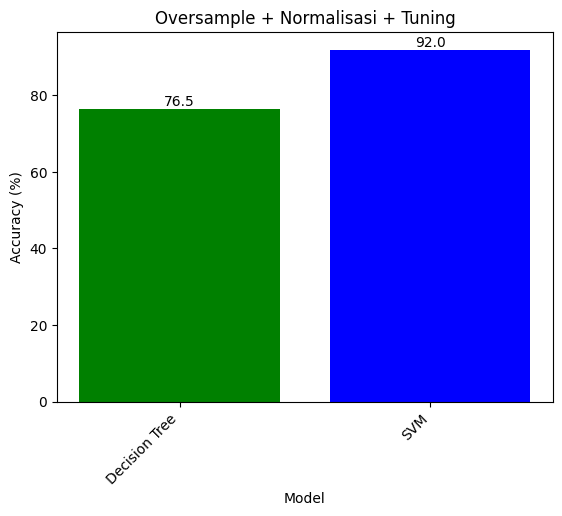

In [211]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample + Normalisasi + Tuning')
plt.xticks(rotation=45, ha='right')

for bar in bars:
  yval= bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), ha='center', va='bottom')
plt.show()

### Perbandingan model terbaik

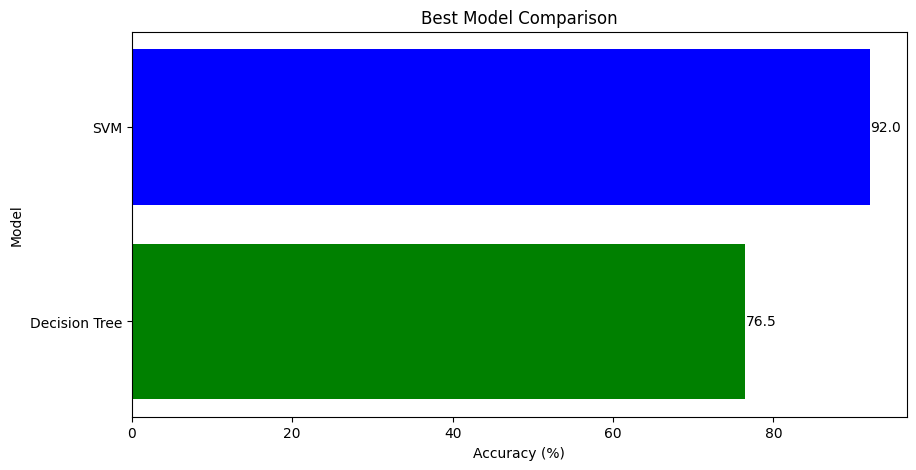

In [215]:
import matplotlib.pyplot as plt

# membuat dataframe untuk perbandingan model
model_compBest = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM'],
    'Accuracy': [accuracy_dt_adasyn_normal_tun*100, accuracy_svm_adasyn_normal_tun*100]
})

fig, ax = plt.subplots(figsize=(10, 5))
bars = plt.barh(model_compBest['Model'], model_compBest['Accuracy'], color=['green', 'blue'])
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.title('Best Model Comparison')

for bar in bars:
  xval = bar.get_width()
  plt.text(xval, bar.get_y() + bar.get_height() / 2, round(xval, 2), ha='left', va='center')
plt.show()